In [945]:
from PCAfold import VQPCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from matplotlib.colors import ListedColormap
from PCAfold import get_centroids

In [946]:
n_points = 1000
save_filename = None
global_color = '#454545'
k1_color = '#0e7da7'
k2_color = '#ceca70'
color_map = ListedColormap([k1_color, k2_color])


In [947]:
mean_local_1 = [0,1]
mean_local_2 = [6,4]
covariance_local_1 = [[2, 0.5], [0.5, 0.5]]
covariance_local_2 = [[3, 0.3], [0.3, 0.5]]

x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_local = np.concatenate([x_noise_1, x_noise_2])
y_local = np.concatenate([y_noise_1, y_noise_2])

Dataset_local = np.hstack((x_local[:,np.newaxis], y_local[:,np.newaxis]))

In [948]:
iris_df = datasets.load_iris(as_frame=True)
iris_df = iris_df.data

In [949]:
# Instantiate VQPCA class object:
vqpca = VQPCA(
    iris_df.to_numpy(),
    n_clusters=3,
    n_components=2,
    scaling='std',
    idx_init='random',
    random_state=42,
    max_iter=100,
    tolerance=1.0e-30,
    verbose=True
)

| It.   | Rec. error      | Error conv.? | Cent. conv.? | Cluster 1  | Cluster 2  | Cluster 3  | Time [min]   |
| 1     | 0.16023959      | False        | False        | 50         | 50         | 50         | 8e-05        |
| 2     | 0.05844648      | False        | False        | 49         | 51         | 50         | 0.00013      |
| 3     | 0.05433008      | False        | False        | 48         | 52         | 50         | 0.00018      |
| 4     | 0.05398382      | False        | False        | 47         | 53         | 50         | 0.00022      |
| 5     | 0.0531863       | False        | True         | 47         | 53         | 50         | 0.00027      |
| 6     | 0.0531863       | True         | True         | 47         | 53         | 50         | 0.00027      |
Convergence reached in iteration: 6

Total time: 0.000271 minutes.
--------------------------------------------------------------------------------------------------------------


In [950]:
centroids = get_centroids(iris_df.to_numpy(), vqpca.idx)

In [951]:
eigenvectors = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0], vqpca.A[2][:, 0]))

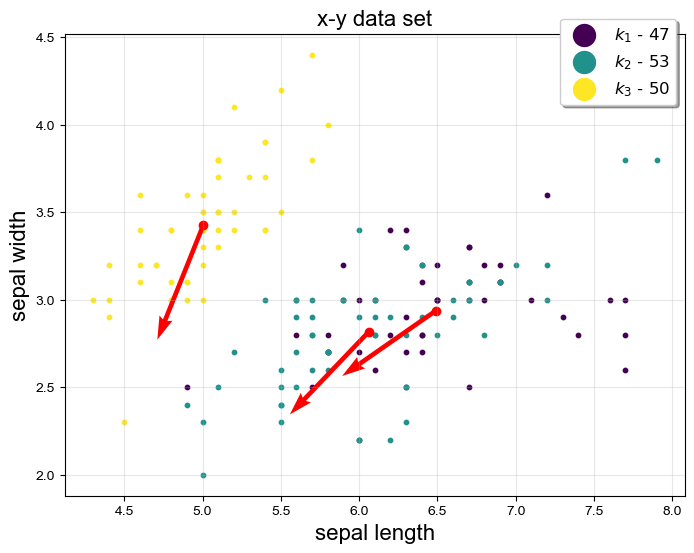

In [952]:
from PCAfold import variable_bins, plot_2d_clustering
import numpy as np

# Plot the clustering result:
plt = plot_2d_clustering(iris_df.to_numpy()[:,0],
                     iris_df.to_numpy()[:,1],
                     vqpca.idx,
                     x_label='sepal length',
                     y_label='sepal width',
                     color_map='viridis',
                     first_cluster_index_zero=False,
                     grid_on=True,
                     figure_size=(8,6),
                     title='x-y data set',
                     save_filename='clustering.pdf')

plt.scatter(centroids[:, 0], centroids[:, 1], color='red')
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors[:, 0], eigenvectors[:, 1], color='red', scale=5)


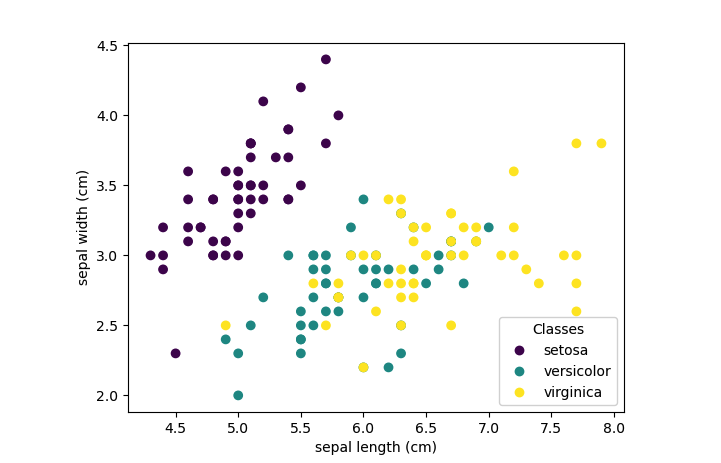